In [2]:
import numpy as np # to handle matrix and data operation
import pandas as pd # to read csv and handle dataframe

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
from torch.autograd import Variable
import torch.optim as optim

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# CUDA?
cuda = torch.cuda.is_available()

# For reproducibility
SEED = 1
torch.manual_seed(SEED)

if cuda:
    print('cuda available..')
    torch.cuda.manual_seed(SEED)

cuda available..


In [3]:
torch.cuda.is_available()

True

In [4]:
dataset_filename = 'data_mnist.csv'
df = pd.read_csv(dataset_filename)
print(df.shape)

(42000, 785)


In [14]:
df.shape

(42000, 785)

In [5]:
y =  df['label'].to_numpy()
X =  df.drop('label', axis = 1).to_numpy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [6]:
print(y_test.shape)

(6300,)


In [17]:
y

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [13]:
X_train.shape

(35700, 784)

In [7]:
BATCH_SIZE = 32

torch_X_train = torch.from_numpy(X_train).type(torch.LongTensor)
torch_y_train = torch.from_numpy(y_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
torch_X_test = torch.from_numpy(X_test).type(torch.LongTensor)
torch_y_test = torch.from_numpy(y_test).type(torch.LongTensor) # data type is long

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(torch_X_train,torch_y_train)
test = torch.utils.data.TensorDataset(torch_X_test,torch_y_test)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = BATCH_SIZE, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = BATCH_SIZE, shuffle = False)

In [8]:
input_dim = 784
output_dim = 10
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.linear1 = nn.Linear(input_dim,250)
        self.linear2 = nn.Linear(250,100)
        self.linear3 = nn.Linear(100,output_dim)
    
    def forward(self,X):
        X = F.relu(self.linear1(X))
        X = F.relu(self.linear2(X))
        X = self.linear3(X)
        return F.log_softmax(X, dim=1)
 
mlp = MLP()
print(mlp)

MLP(
  (linear1): Linear(in_features=784, out_features=250, bias=True)
  (linear2): Linear(in_features=250, out_features=100, bias=True)
  (linear3): Linear(in_features=100, out_features=10, bias=True)
)


In [18]:
for batch, (images, labels) in enumerate(train_loader):
    print(batch)
    print(images)
    print(Variable(images).float())
    break

0
tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [19]:
def fit(model, train_loader):
    optimizer = torch.optim.Adam(model.parameters())
    error = nn.CrossEntropyLoss()
    EPOCHS = 5
    model.train()
    for epoch in range(EPOCHS):
        correct = 0
        for batch_idx, (X_batch, y_batch) in enumerate(train_loader):
            var_X_batch = Variable(X_batch).float()
            var_y_batch = Variable(y_batch)
            optimizer.zero_grad()
            output = model(var_X_batch)
            loss = error(output, var_y_batch)
            loss.backward()
            optimizer.step()

            # Total correct predictions
            predicted = torch.max(output.data, 1)[1] 
            correct += (predicted == var_y_batch).sum()
            #print(correct)
            if batch_idx % 50 == 0:
                print('Epoch : {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\t Accuracy:{:.3f}%'.format(
                    epoch, batch_idx*len(X_batch), len(train_loader.dataset), 100.*batch_idx / len(train_loader), loss.data, float(correct*100) / float(BATCH_SIZE*(batch_idx+1))))

In [20]:
fit(mlp, train_loader)

Epoch : 0 [0/35700 (0%)]	Loss: 13.869745	 Accuracy:6.250%
Epoch : 0 [1600/35700 (4%)]	Loss: 0.776278	 Accuracy:66.789%
Epoch : 0 [3200/35700 (9%)]	Loss: 0.576651	 Accuracy:76.238%
Epoch : 0 [4800/35700 (13%)]	Loss: 0.218799	 Accuracy:80.112%
Epoch : 0 [6400/35700 (18%)]	Loss: 0.147727	 Accuracy:82.307%
Epoch : 0 [8000/35700 (22%)]	Loss: 0.287426	 Accuracy:83.752%
Epoch : 0 [9600/35700 (27%)]	Loss: 0.092025	 Accuracy:84.863%
Epoch : 0 [11200/35700 (31%)]	Loss: 0.203245	 Accuracy:85.755%
Epoch : 0 [12800/35700 (36%)]	Loss: 0.567634	 Accuracy:86.448%
Epoch : 0 [14400/35700 (40%)]	Loss: 0.125028	 Accuracy:86.994%
Epoch : 0 [16000/35700 (45%)]	Loss: 0.254789	 Accuracy:87.556%
Epoch : 0 [17600/35700 (49%)]	Loss: 0.037920	 Accuracy:88.044%
Epoch : 0 [19200/35700 (54%)]	Loss: 0.170525	 Accuracy:88.400%
Epoch : 0 [20800/35700 (58%)]	Loss: 0.100976	 Accuracy:88.657%
Epoch : 0 [22400/35700 (63%)]	Loss: 0.321754	 Accuracy:88.984%
Epoch : 0 [24000/35700 (67%)]	Loss: 0.215747	 Accuracy:89.185%
Epoch

8
tensor(8)


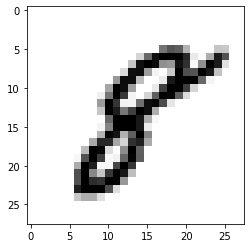

In [21]:
mlp.eval()              # turn the model to evaluate mode
index = 200
torch_X_test = torch.from_numpy(X_test).type(torch.LongTensor)
image = torch_X_test[index].float().unsqueeze(0)
true_label = y_test[index]
with torch.no_grad():     # does not calculate gradient
    class_index = mlp(image).argmax()   #gets the prediction for the image's class
plt.imshow(image.numpy().reshape(28,28,1), cmap='gray_r');
print(true_label)
print(class_index)

In [22]:
torch_X_train = torch_X_train.view(-1, 1,28,28).float()
torch_X_test = torch_X_test.view(-1,1,28,28).float()
print(torch_X_train.shape)
print(torch_X_test.shape)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(torch_X_train,torch_y_train)
test = torch.utils.data.TensorDataset(torch_X_test,torch_y_test)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = BATCH_SIZE, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = BATCH_SIZE, shuffle = False)

torch.Size([35700, 1, 28, 28])
torch.Size([6300, 1, 28, 28])


In [23]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=5)
        self.conv3 = nn.Conv2d(32,64, kernel_size=5)
        self.fc1 = nn.Linear(3*3*64, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(F.max_pool2d(self.conv3(x),2))
        x = F.dropout(x, p=0.5, training=self.training)
        x = x.view(-1,3*3*64 )
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)
 
cnn = CNN()
print(cnn)

it = iter(train_loader)
X_batch, y_batch = next(it)
print(cnn.forward(X_batch).shape)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)
torch.Size([32, 10])


In [24]:
fit(cnn,train_loader)

Epoch : 0 [0/35700 (0%)]	Loss: 14.307978	 Accuracy:12.500%
Epoch : 0 [1600/35700 (4%)]	Loss: 1.705261	 Accuracy:18.444%
Epoch : 0 [3200/35700 (9%)]	Loss: 1.662079	 Accuracy:32.766%
Epoch : 0 [4800/35700 (13%)]	Loss: 1.028291	 Accuracy:44.247%
Epoch : 0 [6400/35700 (18%)]	Loss: 0.929903	 Accuracy:52.114%
Epoch : 0 [8000/35700 (22%)]	Loss: 0.689883	 Accuracy:57.632%
Epoch : 0 [9600/35700 (27%)]	Loss: 0.388848	 Accuracy:61.887%
Epoch : 0 [11200/35700 (31%)]	Loss: 0.642749	 Accuracy:64.975%
Epoch : 0 [12800/35700 (36%)]	Loss: 0.596615	 Accuracy:67.581%
Epoch : 0 [14400/35700 (40%)]	Loss: 0.198605	 Accuracy:69.852%
Epoch : 0 [16000/35700 (45%)]	Loss: 0.377184	 Accuracy:71.700%
Epoch : 0 [17600/35700 (49%)]	Loss: 0.313917	 Accuracy:73.378%
Epoch : 0 [19200/35700 (54%)]	Loss: 0.388675	 Accuracy:74.563%
Epoch : 0 [20800/35700 (58%)]	Loss: 0.450736	 Accuracy:75.682%
Epoch : 0 [22400/35700 (63%)]	Loss: 0.398944	 Accuracy:76.721%
Epoch : 0 [24000/35700 (67%)]	Loss: 0.191631	 Accuracy:77.651%
Epoc

2
tensor(2)


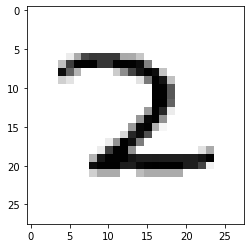

In [25]:
cnn.eval()              # turn the model to evaluate mode
index = 100
torch_X_test = torch_X_test.view(-1,1,28,28).float().type(torch.LongTensor)
image = torch_X_test[index].float().unsqueeze(0)
true_label = y_test[index]
with torch.no_grad():     # does not calculate gradient
    class_index = cnn(image).argmax()   #gets the prediction for the image's class
plt.imshow(image.numpy().reshape(28,28,1), cmap='gray_r');
print(true_label)
print(class_index)

MLP -> Epoch : 4 [35200/35700 (99%)]	Loss: 0.471549	 Accuracy:96.983%  
CNN -> Epoch : 4 [35200/35700 (99%)]	Loss: 0.203570	 Accuracy:95.158%  

The MLP model has a slightly higher accuracy but also a significanlty larger loss. A high accuracy with a high loss means the model made large errors on a few data records. The MLP model also trained very fast at 12.5 seconds.    

The CNN model has a slightly lower accuracy but a signicantly smaller loss than the MLP model. This means that although the MLP model classified more of the data correctly, the one's that it got wrong were larger errors. The CNN model took significantly longer to train at 1 minute and 32.2 seconds. Depending on your use-case of the model, you might prefer the slightly higher accuracy/training speed of the MLP or the lower loss of the CNN model. 